# 기본 세팅

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [2]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission_0331.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

args.save_results

'C:\\Users\\User\\Desktop\\model_results.csv'

### 데이터 로드

In [3]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

### 폰트 설정

In [4]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

In [5]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\sylfaen.ttf', 'C:\\Windows\\Fonts\\HANBatangExtB.ttf', 'C:\\Windows\\Fonts\\segoeuii.ttf', 'C:\\Windows\\Fonts\\framdit.ttf', 'C:\\Windows\\Fonts\\HMFMOLD.TTF', 'C:\\Windows\\Fonts\\bahnschrift.ttf', 'C:\\Windows\\Fonts\\GOTHIC.TTF', 'C:\\Windows\\Fonts\\impact.ttf', 'C:\\Windows\\Fonts\\seguihis.ttf', 'C:\\Windows\\Fonts\\DUBAI-MEDIUM.TTF', 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf', 'C:\\Windows\\Fonts\\gulim.ttc', 'C:\\Windows\\Fonts\\calibrii.ttf', 'C:\\Windows\\Fonts\\CENTURY.TTF', 'C:\\Windows\\Fonts\\segoeui.ttf', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\segoeprb.ttf', 'C:\\Windows\\Fonts\\corbell.ttf', 'C:\\Windows\\Fonts\\batang.ttc', 'C:\\Windows\\Fonts\\HANDotum.ttf', 'C:\\Windows\\Fonts\\H2MJSM.TTF', 'C:\\Windows\\Fonts\\MTCORSVA.TTF', 'C:\\Windows\\Fonts\\comicbd.ttf', 'C:\\Windows\\Fonts\\GOTHICB.TTF', 'C:\\Windows\\Fonts\\Candarab.ttf', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\nta

In [6]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


# 데이터 확인 

In [7]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
ori_train.head(2)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.875,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.750,NaN,Q


In [9]:
ori_test.columns # survived 가 빠짐 

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
ori_test.head(2)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


# EDA

### 데이터 바꾸기

In [11]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [12]:
ori_test.set_index(['passengerid'], inplace=True) 
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


### 수치형 데이터 분석

In [13]:
df_number = ori_train.select_dtypes(include=np.number)

In [14]:
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [15]:
df_number.describe() # age가 수가 적음(결측치가 있을 것이다)

,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,0.377729,2.292576,29.698370,0.507642,0.361354,32.402710
std,0.485084,0.838675,14.185627,1.044866,0.828054,50.506411
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:ylabel='age'>

findfont: Font family ['Noto Sans KR'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans KR'] not found. Falling back to DejaVu Sans.


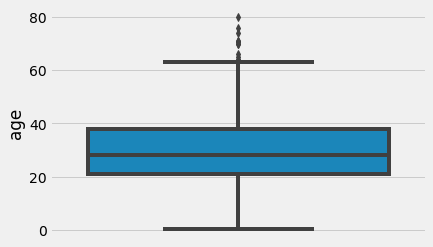

In [16]:
sns.boxplot(y=df_number['age'], data=df_number)

<AxesSubplot:ylabel='fare'>

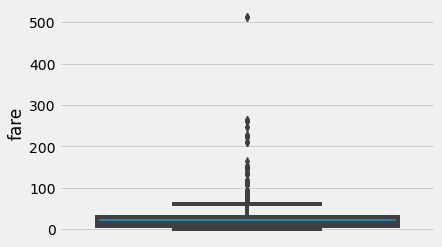

In [17]:
sns.boxplot(y=df_number['fare'], data=df_number)

In [18]:
df_number[df_number['pclass']==3].mean()

survived     0.280808
pclass       3.000000
age         24.643483
sibsp        0.587879
parch        0.408081
fare        13.566363
dtype: float64

In [19]:
df_number[df_number['pclass']==2].mean()

survived     0.391753
pclass       2.000000
age         29.844262
sibsp        0.386598
parch        0.319588
fare        20.388036
dtype: float64

In [20]:
df_number[df_number['pclass']==1].mean()

survived     0.577093
pclass       1.000000
age         38.697563
sibsp        0.436123
parch        0.295154
fare        83.745613
dtype: float64

### 범주형 데이터 분석

In [21]:
df_object = ori_train.select_dtypes(exclude=np.number)

In [22]:
df_object = df_object.join(df_number['survived']) # survived 추가
df_object['survived'] = df_object['survived'].astype('object') # 데이터 타입 변경
df_object.columns

Index(['name', 'gender', 'ticket', 'cabin', 'embarked', 'survived'], dtype='object')

In [23]:
df_object['gender'].value_counts()

male      589
female    327
Name: gender, dtype: int64

In [24]:
df_object['embarked'].value_counts()

S    645
C    189
Q     81
Name: embarked, dtype: int64

# train_test_split


In [25]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=ori_train['survived'], random_state=21)
# stratify 는 층을 나누는데 비율로 똑같이 나눠줘라는 뜻
# X_tr , X_te 는 feature와 target칼럼이 있고 Y_tr , Y_te는 target 칼럼만 있음
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

In [27]:
train = X_tr.copy()
test = X_te.copy()
ori_te = ori_test.copy()

train.shape , test.shape , ori_te.shape

((641, 10), (275, 10), (393, 10))

In [28]:
train.drop(['ticket','cabin','name'], axis=1, inplace=True)

In [29]:
test.drop(['ticket','cabin','name'], axis=1, inplace=True)

In [30]:
ori_te.shape , ori_test.shape

((393, 10), (393, 10))

# *Base ModelV0*

### data processing

#### 결측치 처리

In [31]:
train.isnull().sum()

pclass        0
gender        0
age         129
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [32]:
test.isnull().sum()

pclass       0
gender       0
age         51
sibsp        0
parch        0
fare         0
embarked     1
dtype: int64

In [33]:
ori_te.isnull().sum()

pclass        0
name          0
gender        0
age          83
sibsp         0
parch         0
ticket        0
fare          1
cabin       296
embarked      1
dtype: int64

In [34]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.4, 'S')

In [35]:
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)


### data encoding

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
train.columns 
# train data 중에서 70퍼인 train (641,8)

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [38]:
enc_cols = ['gender', 'embarked'] # 문자형 데이터
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols # gender , embarked 를 뺸 있는 list(수치형데이터)

['age', 'fare', 'pclass', 'sibsp', 'parch']

In [39]:
enc = OneHotEncoder()

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}') # gender가 두개로 , embarked가 3개로 

before: (641, 7) / (275, 7) / (393, 10)
after: (641, 10) / (275, 10) / (393, 10)


### Training

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
modelV0 = DecisionTreeClassifier(random_state=21)

print(f'{enc_tr.shape} / {y_tr.shape}')
modelV0.fit(enc_tr, y_tr) # 적합 시킨다 

(641, 10) / (641,)


DecisionTreeClassifier(random_state=21)

### Evaluation

In [42]:
score_tr = modelV0.score(enc_tr, y_tr) # 인코딩된 train 데이터로 Y_tr 타겟팅 
score_te = modelV0.score(enc_te, y_te) # 인코딩된 test 데이터로 Y_te 타겟팅

score_tr, score_te  

(0.982839313572543, 0.7781818181818182)

In [43]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV0.predict_proba(enc_te)[:,1] # 인코딩된 모델을 예측함
# 학습률 평가 
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7666160593792173


In [44]:
ori_te_pred = modelV0.predict_proba(enc_ori_te)[:,1] # enc_ori_te (실제 test 데이터에 적용을 시킴)

In [45]:
df_feature_importances = pd.DataFrame(modelV0.feature_importances_, enc_tr.columns).sort_values(by=[0], ascending=False).reset_index()

print(f'{df_feature_importances.shape}')
df_feature_importances

(10, 2)


,index,0
0,gender_female,0.492979
1,fare,0.200524
2,age,0.172536
3,pclass,0.063814
4,sibsp,0.039875
5,embarked_S,0.014289
6,embarked_C,0.008587
7,parch,0.007396
8,gender_male,0.000000
9,embarked_Q,0.000000


In [46]:
args.results.append(
    {
        'model': 'modelV0',
        'score_tr': score_tr,
        'score_te': score_te,
        'auc_te': auc_te,
        'ori_te_pred': ori_te_pred,
        'len_features': X_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
        'create_dt': '0330'
    }
)

# *Base ModelV1*

In [47]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

### Data preprocessing

In [48]:
print(f'before: {train.shape} / {test.shape}')
drop_cols = ['name', 'ticket', 'cabin']

train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
ori_te.drop(drop_cols, axis=1, inplace=True)


print(f'after: {train.shape} / {test.shape}')

before: (641, 10) / (275, 10)
after: (641, 7) / (275, 7)


#### 결측치 처리

In [49]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.4, 'S')

In [50]:
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

### data encoding

In [51]:
enc_cols = ['gender', 'embarked']
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['age', 'fare', 'pclass', 'sibsp', 'parch']

In [52]:
enc = OneHotEncoder()

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')
# gender가 두개로 , embarked가 3개로 

before: (641, 7) / (275, 7) / (393, 7)
after: (641, 10) / (275, 10) / (393, 10)


### Scaler

In [53]:
enc_tr.columns

Index(['age', 'fare', 'pclass', 'sibsp', 'parch', 'gender_female',
       'gender_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [54]:
scaling_cols = ['age', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))
not_scaling_cols 

['embarked_C',
 'gender_female',
 'pclass',
 'gender_male',
 'embarked_Q',
 'sibsp',
 'parch',
 'embarked_S']

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
std = StandardScaler()

_scaled_tr = std.fit_transform(enc_tr[scaling_cols])
_scaled_te = std.transform(enc_te[scaling_cols])
_scaled_ori_te = std.transform(enc_ori_te[scaling_cols])

In [57]:
print(f'before: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)


print(f'after: {scaled_tr.shape} / {scaled_te.shape} / {scaled_ori_te.shape}')

before: (641, 10) / (275, 10) / (393, 10)
after: (641, 10) / (275, 10) / (393, 10)


### Training

In [58]:
from sklearn.ensemble import RandomForestClassifier

modelV1 = RandomForestClassifier(random_state=21)

modelV1.fit(scaled_tr, y_tr)

RandomForestClassifier(random_state=21)

### Evaluation

In [59]:
score_tr = modelV1.score(scaled_tr, y_tr)
score_te = modelV1.score(scaled_te, y_te) 

score_tr, score_te  

(0.982839313572543, 0.8145454545454546)

In [60]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV1.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8940058479532164


In [61]:
ori_te_pred = modelV1.predict_proba(scaled_ori_te)[:,1]

In [62]:
df_feature_importances = pd.DataFrame(modelV1.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
print(f'{df_feature_importances.shape}')

(10, 2)


In [63]:
args.results.append(
    {
        'model': 'modelV1',
        'score_tr': score_tr,
        'score_te': score_te,
        'auc_te': auc_te,
        'ori_te_pred': ori_te_pred,
        'len_features': X_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
        'create_dt': '0330'
    }
)

# Base ModelV2

In [64]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

### Data processing

In [65]:
print(f'before: {train.shape} / {test.shape}')
drop_cols = ['name', 'ticket', 'cabin']

train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
ori_te.drop(drop_cols, axis=1, inplace=True)

print(f'after: {train.shape} / {test.shape}')

before: (641, 10) / (275, 10)
after: (641, 7) / (275, 7)


#### 결측치 처리

In [66]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

### scaler

In [67]:
scaling_cols = ['age', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

before: (641, 10) / (275, 10)
after: (641, 10) / (275, 10)


In [68]:
scaled_tr.shape, scaled_te.shape, scaled_ori_te.shape

((641, 10), (275, 10), (393, 10))

### Training

In [69]:
from sklearn.tree import DecisionTreeClassifier

modelV2 = DecisionTreeClassifier(random_state=21)

modelV2.fit(scaled_tr, y_tr)

DecisionTreeClassifier(random_state=21)

### Evaluation

In [70]:
score_tr = modelV2.score(scaled_tr, y_tr)
score_te = modelV2.score(scaled_te, y_te) 

score_tr, score_te  

(0.982839313572543, 0.7781818181818182)

In [71]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV2.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7624269005847952


In [72]:
ori_te_pred = modelV2.predict_proba(scaled_ori_te)[:,1]

In [73]:
df_feature_importances = pd.DataFrame(modelV2.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
print(f'{df_feature_importances.shape}')

(10, 2)


In [74]:
args.results.append(
    {
        'model': 'modelV2',
        'score_tr': score_tr,
        'score_te': score_te,
        'auc_te': auc_te,
        'ori_te_pred': ori_te_pred,
        'len_features': X_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
        'create_dt': '0330'
    }
)

# Submission

In [75]:
df_results = pd.DataFrame(args.results).sort_values(by=['auc_te'], ascending=False)
df_results

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
1,modelV1,0.982839,0.814545,0.894006,"[0.61, 1.0, 1.0, 0.0, 0.93, 0.87, 0.0, 0.11184...",10,"[gender_male, gender_female, fare, age, pclass...",0330
0,modelV0,0.982839,0.778182,0.766616,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.125, 1.0...",10,"[gender_female, fare, age, pclass, sibsp, emba...",0330
2,modelV2,0.982839,0.778182,0.762427,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.125, 1.0...",10,"[gender_male, fare, age, pclass, sibsp, embark...",0330


In [76]:
submission = pd.read_csv(args.default_submission_csv)
submission.head(2)

,passengerid,survived
0,916,0.5
1,917,0.5


In [77]:
submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0]
print(f'{submission.isnull().sum().sum()}')
submission.head()

0


,passengerid,survived
0,916,1.0
1,917,1.0
2,918,1.0
3,919,0.0
4,920,1.0


In [78]:
submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0330.csv로 저장된다

## 기존 결과 저장

In [79]:
args.save_results

'C:\\Users\\User\\Desktop\\model_results.csv'

In [80]:
df_results.columns

Index(['model', 'score_tr', 'score_te', 'auc_te', 'ori_te_pred',
       'len_features', 'feaute_importances', 'create_dt'],
      dtype='object')

In [81]:
df_results.drop(['ori_te_pred'], axis=1, inplace=True) 

In [82]:
df_results.head()

,model,score_tr,score_te,auc_te,len_features,feaute_importances,create_dt
1,modelV1,0.982839,0.814545,0.894006,10,"[gender_male, gender_female, fare, age, pclass...",0330
0,modelV0,0.982839,0.778182,0.766616,10,"[gender_female, fare, age, pclass, sibsp, emba...",0330
2,modelV2,0.982839,0.778182,0.762427,10,"[gender_male, fare, age, pclass, sibsp, embark...",0330


In [83]:
df_results.to_csv(args.save_results)